# 강혜수 과제

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [31]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## train

In [32]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [33]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [34]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


## 모델 예측 성능 평가

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
    
def get_model_train_eval(model, feature_train=None, feature_test=None, target_train=None, target_test=None):
    model.fit(feature_train, target_train)
    pred=model.predict(feature_test)
    pred_proba=model.predict_proba(feature_test)[:,1]
    confusion=confusion_matrix(target_test,pred)
    accuracy=accuracy_score(target_test,pred)
    precision=precision_score(target_test,pred)
    recall=recall_score(target_test,pred)
    f1=f1_score(target_test,pred)
    roc_auc=roc_auc_score(target_test,pred_proba)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [36]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()

print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)

로지스틱 회귀 성능
정확도: 0.9991, 정밀도: 0.8529, 재현율: 0.5878, F1: 0.6960, AUC: 0.9576


## 데이터의 비대칭 해결(기존 모델 평가 후 데이터전처리를 통한 개선 효과 비교)

<AxesSubplot:xlabel='Amount', ylabel='Density'>

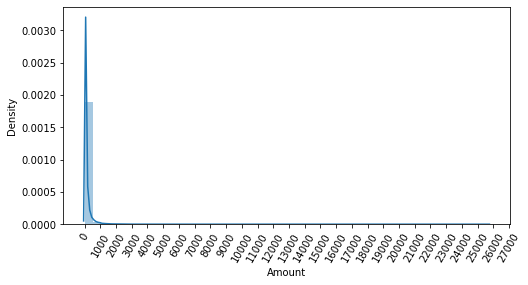

In [37]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

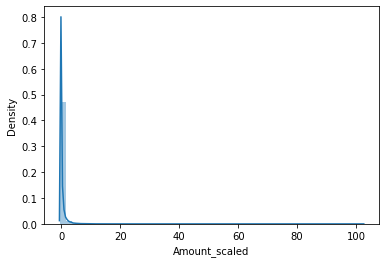

In [38]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy=df.copy()
    scaler=StandardScaler()
    amount_StandardScaled=scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0,'Amount_scaled',amount_StandardScaled)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    sns.distplot(df_copy['Amount_scaled'])
    return df_copy

X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

## 모델 예측 성능 재평가

In [39]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()

print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)

로지스틱 회귀 성능
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, AUC: 0.9702


### xgboost

In [40]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

import xgboost as xgb
from xgboost import XGBClassifier

#객체로 만들어주기 wrapper라는 변수 안에 classifier 부스터 만들어주기
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
#보통은 test말고 validation 자료를 만들어서 평가해줌
evals = [(X_test, y_test)]
#학습시키기
#eval metric 평가를 어떻게 할건지? -> logloss
#early stopping round : 조기종료와 반복수를 설정해두는 것
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

get_clf_eval(y_test , ws100_preds)

#202번째에서 가장 작은 값

from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

evals = [(X_test, y_test)]


[0]	validation_0-logloss:0.59835
[1]	validation_0-logloss:0.52083
[2]	validation_0-logloss:0.45608
[3]	validation_0-logloss:0.40135
[4]	validation_0-logloss:0.35471
[5]	validation_0-logloss:0.31441
[6]	validation_0-logloss:0.27953
[7]	validation_0-logloss:0.24911
[8]	validation_0-logloss:0.22243
[9]	validation_0-logloss:0.19898
[10]	validation_0-logloss:0.17830
[11]	validation_0-logloss:0.15995
[12]	validation_0-logloss:0.14368
[13]	validation_0-logloss:0.12922
[14]	validation_0-logloss:0.11630
[15]	validation_0-logloss:0.10478
[16]	validation_0-logloss:0.09450
[17]	validation_0-logloss:0.08527
[18]	validation_0-logloss:0.07703
[19]	validation_0-logloss:0.06963
[20]	validation_0-logloss:0.06299
[21]	validation_0-logloss:0.05702
[22]	validation_0-logloss:0.05166
[23]	validation_0-logloss:0.04685
[24]	validation_0-logloss:0.04251
[25]	validation_0-logloss:0.03860
[26]	validation_0-logloss:0.03509
[27]	validation_0-logloss:0.03193
[28]	validation_0-logloss:0.02908
[29]	validation_0-loglos

[238]	validation_0-logloss:0.00279
[239]	validation_0-logloss:0.00279
[240]	validation_0-logloss:0.00278
[241]	validation_0-logloss:0.00278
[242]	validation_0-logloss:0.00279
[243]	validation_0-logloss:0.00278
[244]	validation_0-logloss:0.00279
[245]	validation_0-logloss:0.00279
[246]	validation_0-logloss:0.00279
[247]	validation_0-logloss:0.00279
[248]	validation_0-logloss:0.00279
[249]	validation_0-logloss:0.00279
[250]	validation_0-logloss:0.00278
[251]	validation_0-logloss:0.00279
[252]	validation_0-logloss:0.00279
[253]	validation_0-logloss:0.00279
[254]	validation_0-logloss:0.00279
[255]	validation_0-logloss:0.00279
[256]	validation_0-logloss:0.00279
[257]	validation_0-logloss:0.00279
[258]	validation_0-logloss:0.00278
[259]	validation_0-logloss:0.00279
[260]	validation_0-logloss:0.00279
[261]	validation_0-logloss:0.00278
[262]	validation_0-logloss:0.00279
[263]	validation_0-logloss:0.00279
[264]	validation_0-logloss:0.00279
[265]	validation_0-logloss:0.00279
[266]	validation_0-l

### lightbgm

In [41]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400, boost_from_average = True)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

#101번에서 멈췄으니 1번이 제일 좋은 값 /가장 낮은 값

[1]	valid_0's binary_logloss: 0.0130349
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.0483536
[3]	valid_0's binary_logloss: 0.0134134
[4]	valid_0's binary_logloss: 0.0140827
[5]	valid_0's binary_logloss: 0.0146976
[6]	valid_0's binary_logloss: 0.0170486
[7]	valid_0's binary_logloss: 0.0156368
[8]	valid_0's binary_logloss: 0.0177323
[9]	valid_0's binary_logloss: 0.0205379
[10]	valid_0's binary_logloss: 0.021409
[11]	valid_0's binary_logloss: 0.0231373
[12]	valid_0's binary_logloss: 0.0180461
[13]	valid_0's binary_logloss: 0.0159916
[14]	valid_0's binary_logloss: 0.0158133
[15]	valid_0's binary_logloss: 0.0159068
[16]	valid_0's binary_logloss: 0.0255675
[17]	valid_0's binary_logloss: 0.0174252
[18]	valid_0's binary_logloss: 0.0216646
[19]	valid_0's binary_logloss: 0.0230698
[20]	valid_0's binary_logloss: 0.0249559
[21]	valid_0's binary_logloss: 0.0241783
[22]	valid_0's binary_logloss: 0.0251395
[23]	valid_0's binary_logloss: 0.0329316
[24]	

In [42]:
get_clf_eval(y_test, preds)

오차 행렬
[[85227    68]
 [   33   115]]
정확도: 0.9988, 정밀도: 0.6284, 재현율: 0.7770,    F1: 0.6949, AUC:0.8881


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

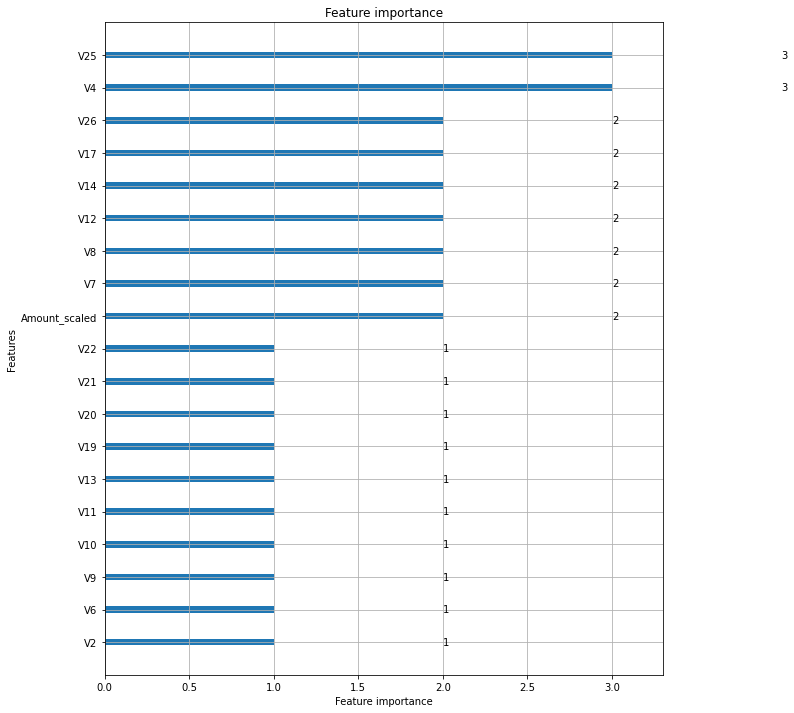

In [43]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## gridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)
params = {'max_depth':[6, 8] , 'min_child_weight':[3,5] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
#수행속도 향상을 위해 early stopping rounds 숫자 적게 잡음
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.89092	validation_1-auc:0.83774
[1]	validation_0-auc:0.89665	validation_1-auc:0.86127
[2]	validation_0-auc:0.91680	validation_1-auc:0.88796
[3]	validation_0-auc:0.92989	validation_1-auc:0.90826
[4]	validation_0-auc:0.92989	validation_1-auc:0.90826
[5]	validation_0-auc:0.92990	validation_1-auc:0.90828
[6]	validation_0-auc:0.93134	validation_1-auc:0.90825
[7]	validation_0-auc:0.93535	validation_1-auc:0.91794
[8]	validation_0-auc:0.95718	validation_1-auc:0.94605
[9]	validation_0-auc:0.95716	validation_1-auc:0.94586
[10]	validation_0-auc:0.96654	validation_1-auc:0.95138
[11]	validation_0-auc:0.96675	validation_1-auc:0.95189
[12]	validation_0-auc:0.96998	validation_1-auc:0.95205
[13]	validation_0-auc:0.97248	validation_1-auc:0.95398
[14]	validation_0-auc:0.97682	validation_1-auc:0.95869
[15]	validation_0-auc:0.97858	validation_1-auc:0.95854
[16]	validation_0-auc:0.97881	validation_1-auc:0.95860
[17]	validation_0-auc:0.97823	validation_1-auc:0.96572
[18]	validation_0-au

[24]	validation_0-auc:0.99133	validation_1-auc:0.96645
[25]	validation_0-auc:0.99253	validation_1-auc:0.97051
[26]	validation_0-auc:0.99513	validation_1-auc:0.97023
[27]	validation_0-auc:0.99483	validation_1-auc:0.97219
[28]	validation_0-auc:0.99501	validation_1-auc:0.97471
[29]	validation_0-auc:0.99539	validation_1-auc:0.97747
[30]	validation_0-auc:0.99532	validation_1-auc:0.97681
[31]	validation_0-auc:0.99523	validation_1-auc:0.97452
[32]	validation_0-auc:0.99585	validation_1-auc:0.97246
[33]	validation_0-auc:0.99543	validation_1-auc:0.97100
[34]	validation_0-auc:0.99549	validation_1-auc:0.97251
[35]	validation_0-auc:0.99520	validation_1-auc:0.97450
[36]	validation_0-auc:0.99546	validation_1-auc:0.97484
[37]	validation_0-auc:0.99535	validation_1-auc:0.97457
[38]	validation_0-auc:0.99518	validation_1-auc:0.97406
[39]	validation_0-auc:0.99483	validation_1-auc:0.97506
[40]	validation_0-auc:0.99468	validation_1-auc:0.97518
[41]	validation_0-auc:0.99507	validation_1-auc:0.97537
[42]	valid

[41]	validation_0-auc:0.99651	validation_1-auc:0.98109
[42]	validation_0-auc:0.99643	validation_1-auc:0.98084
[43]	validation_0-auc:0.99630	validation_1-auc:0.97991
[44]	validation_0-auc:0.99645	validation_1-auc:0.97995
[45]	validation_0-auc:0.99668	validation_1-auc:0.97928
[46]	validation_0-auc:0.99683	validation_1-auc:0.97954
[47]	validation_0-auc:0.99680	validation_1-auc:0.97876
[48]	validation_0-auc:0.99668	validation_1-auc:0.97879
[49]	validation_0-auc:0.99684	validation_1-auc:0.97907
[50]	validation_0-auc:0.99692	validation_1-auc:0.97852
[51]	validation_0-auc:0.99669	validation_1-auc:0.97714
[52]	validation_0-auc:0.99703	validation_1-auc:0.97838
[53]	validation_0-auc:0.99708	validation_1-auc:0.97771
[54]	validation_0-auc:0.99723	validation_1-auc:0.97816
[55]	validation_0-auc:0.99736	validation_1-auc:0.97818
[56]	validation_0-auc:0.99766	validation_1-auc:0.97916
[57]	validation_0-auc:0.99772	validation_1-auc:0.97916
[58]	validation_0-auc:0.99767	validation_1-auc:0.97855
[0]	valida

[73]	validation_0-auc:0.99503	validation_1-auc:0.98509
[74]	validation_0-auc:0.99508	validation_1-auc:0.98502
[75]	validation_0-auc:0.99495	validation_1-auc:0.98483
[76]	validation_0-auc:0.99505	validation_1-auc:0.98474
[77]	validation_0-auc:0.99491	validation_1-auc:0.98406
[78]	validation_0-auc:0.99513	validation_1-auc:0.98415
[79]	validation_0-auc:0.99528	validation_1-auc:0.98398
[80]	validation_0-auc:0.99519	validation_1-auc:0.98372
[81]	validation_0-auc:0.99521	validation_1-auc:0.98368
[82]	validation_0-auc:0.99507	validation_1-auc:0.98310
[83]	validation_0-auc:0.99524	validation_1-auc:0.98263
[84]	validation_0-auc:0.99509	validation_1-auc:0.98291
[85]	validation_0-auc:0.99514	validation_1-auc:0.98302
[86]	validation_0-auc:0.99517	validation_1-auc:0.98344
[87]	validation_0-auc:0.99518	validation_1-auc:0.98384
[88]	validation_0-auc:0.99510	validation_1-auc:0.98392
[89]	validation_0-auc:0.99514	validation_1-auc:0.98442
[90]	validation_0-auc:0.99517	validation_1-auc:0.98466
[91]	valid

[54]	validation_0-auc:0.99632	validation_1-auc:0.97850
[55]	validation_0-auc:0.99640	validation_1-auc:0.97838
[56]	validation_0-auc:0.99634	validation_1-auc:0.97752
[57]	validation_0-auc:0.99652	validation_1-auc:0.97799
[58]	validation_0-auc:0.99647	validation_1-auc:0.97863
[59]	validation_0-auc:0.99666	validation_1-auc:0.97841
[60]	validation_0-auc:0.99645	validation_1-auc:0.97764
[61]	validation_0-auc:0.99652	validation_1-auc:0.97853
[62]	validation_0-auc:0.99649	validation_1-auc:0.97906
[63]	validation_0-auc:0.99652	validation_1-auc:0.97867
[64]	validation_0-auc:0.99665	validation_1-auc:0.97879
[65]	validation_0-auc:0.99680	validation_1-auc:0.97913
[66]	validation_0-auc:0.99676	validation_1-auc:0.97857
[67]	validation_0-auc:0.99670	validation_1-auc:0.97880
[68]	validation_0-auc:0.99658	validation_1-auc:0.97882
[69]	validation_0-auc:0.99644	validation_1-auc:0.97905
[70]	validation_0-auc:0.99642	validation_1-auc:0.97974
[71]	validation_0-auc:0.99632	validation_1-auc:0.97837
[72]	valid

[70]	validation_0-auc:0.99368	validation_1-auc:0.98001
[71]	validation_0-auc:0.99381	validation_1-auc:0.97993
[72]	validation_0-auc:0.99386	validation_1-auc:0.97934
[73]	validation_0-auc:0.99387	validation_1-auc:0.97970
[74]	validation_0-auc:0.99409	validation_1-auc:0.97986
[75]	validation_0-auc:0.99430	validation_1-auc:0.97977
[76]	validation_0-auc:0.99417	validation_1-auc:0.98049
[77]	validation_0-auc:0.99423	validation_1-auc:0.98013
[78]	validation_0-auc:0.99409	validation_1-auc:0.98026
[79]	validation_0-auc:0.99393	validation_1-auc:0.97994
[80]	validation_0-auc:0.99394	validation_1-auc:0.97996
[81]	validation_0-auc:0.99405	validation_1-auc:0.97989
[82]	validation_0-auc:0.99408	validation_1-auc:0.97968
[83]	validation_0-auc:0.99408	validation_1-auc:0.97977
[84]	validation_0-auc:0.99409	validation_1-auc:0.97983
[85]	validation_0-auc:0.99404	validation_1-auc:0.98008
[86]	validation_0-auc:0.99416	validation_1-auc:0.97997
[87]	validation_0-auc:0.99422	validation_1-auc:0.98036
[88]	valid

[69]	validation_0-auc:0.99542	validation_1-auc:0.97390
[70]	validation_0-auc:0.99531	validation_1-auc:0.97367
[71]	validation_0-auc:0.99520	validation_1-auc:0.97419
[72]	validation_0-auc:0.99520	validation_1-auc:0.97480
[73]	validation_0-auc:0.99508	validation_1-auc:0.97443
[74]	validation_0-auc:0.99505	validation_1-auc:0.97446
[75]	validation_0-auc:0.99519	validation_1-auc:0.97506
[76]	validation_0-auc:0.99517	validation_1-auc:0.97511
[0]	validation_0-auc:0.89526	validation_1-auc:0.84108
[1]	validation_0-auc:0.90522	validation_1-auc:0.86779
[2]	validation_0-auc:0.91370	validation_1-auc:0.88431
[3]	validation_0-auc:0.92828	validation_1-auc:0.90803
[4]	validation_0-auc:0.92830	validation_1-auc:0.90808
[5]	validation_0-auc:0.92831	validation_1-auc:0.90809
[6]	validation_0-auc:0.94851	validation_1-auc:0.92962
[7]	validation_0-auc:0.94853	validation_1-auc:0.92965
[8]	validation_0-auc:0.96650	validation_1-auc:0.95136
[9]	validation_0-auc:0.96653	validation_1-auc:0.95074
[10]	validation_0-au

[18]	validation_0-auc:0.97782	validation_1-auc:0.96109
[19]	validation_0-auc:0.98762	validation_1-auc:0.97423
[20]	validation_0-auc:0.98681	validation_1-auc:0.97294
[21]	validation_0-auc:0.98722	validation_1-auc:0.97051
[22]	validation_0-auc:0.98972	validation_1-auc:0.97177
[23]	validation_0-auc:0.99010	validation_1-auc:0.97690
[24]	validation_0-auc:0.99013	validation_1-auc:0.97556
[25]	validation_0-auc:0.99086	validation_1-auc:0.97853
[26]	validation_0-auc:0.99185	validation_1-auc:0.98287
[27]	validation_0-auc:0.99260	validation_1-auc:0.98332
[28]	validation_0-auc:0.99265	validation_1-auc:0.98475
[29]	validation_0-auc:0.99259	validation_1-auc:0.98547
[30]	validation_0-auc:0.99276	validation_1-auc:0.98564
[31]	validation_0-auc:0.99325	validation_1-auc:0.98510
[32]	validation_0-auc:0.99274	validation_1-auc:0.98476
[33]	validation_0-auc:0.99253	validation_1-auc:0.98358
[34]	validation_0-auc:0.99415	validation_1-auc:0.98406
[35]	validation_0-auc:0.99404	validation_1-auc:0.98484
[36]	valid

[29]	validation_0-auc:0.99340	validation_1-auc:0.97977
[30]	validation_0-auc:0.99390	validation_1-auc:0.97990
[31]	validation_0-auc:0.99406	validation_1-auc:0.97935
[32]	validation_0-auc:0.99372	validation_1-auc:0.97922
[33]	validation_0-auc:0.99417	validation_1-auc:0.98040
[34]	validation_0-auc:0.99491	validation_1-auc:0.98111
[35]	validation_0-auc:0.99459	validation_1-auc:0.98185
[36]	validation_0-auc:0.99410	validation_1-auc:0.98243
[37]	validation_0-auc:0.99391	validation_1-auc:0.98211
[38]	validation_0-auc:0.99393	validation_1-auc:0.98166
[39]	validation_0-auc:0.99382	validation_1-auc:0.98104
[40]	validation_0-auc:0.99351	validation_1-auc:0.98016
[41]	validation_0-auc:0.99329	validation_1-auc:0.98053
[42]	validation_0-auc:0.99323	validation_1-auc:0.98034
[43]	validation_0-auc:0.99375	validation_1-auc:0.98038
[44]	validation_0-auc:0.99373	validation_1-auc:0.98028
[45]	validation_0-auc:0.99346	validation_1-auc:0.98005
[46]	validation_0-auc:0.99359	validation_1-auc:0.97967
[47]	valid

[21]	validation_0-auc:0.99035	validation_1-auc:0.97361
[22]	validation_0-auc:0.99203	validation_1-auc:0.97369
[23]	validation_0-auc:0.99327	validation_1-auc:0.97183
[24]	validation_0-auc:0.99350	validation_1-auc:0.97442
[25]	validation_0-auc:0.99340	validation_1-auc:0.97871
[26]	validation_0-auc:0.99411	validation_1-auc:0.97920
[27]	validation_0-auc:0.99484	validation_1-auc:0.97806
[28]	validation_0-auc:0.99597	validation_1-auc:0.97936
[29]	validation_0-auc:0.99597	validation_1-auc:0.98050
[30]	validation_0-auc:0.99662	validation_1-auc:0.97851
[31]	validation_0-auc:0.99704	validation_1-auc:0.97752
[32]	validation_0-auc:0.99764	validation_1-auc:0.97814
[33]	validation_0-auc:0.99756	validation_1-auc:0.98035
[34]	validation_0-auc:0.99779	validation_1-auc:0.98135
[35]	validation_0-auc:0.99776	validation_1-auc:0.98225
[36]	validation_0-auc:0.99758	validation_1-auc:0.98248
[37]	validation_0-auc:0.99768	validation_1-auc:0.98335
[38]	validation_0-auc:0.99786	validation_1-auc:0.98227
[39]	valid

[44]	validation_0-auc:0.99685	validation_1-auc:0.97913
[45]	validation_0-auc:0.99673	validation_1-auc:0.97783
[46]	validation_0-auc:0.99656	validation_1-auc:0.97804
[47]	validation_0-auc:0.99699	validation_1-auc:0.97978
[48]	validation_0-auc:0.99710	validation_1-auc:0.97831
[49]	validation_0-auc:0.99699	validation_1-auc:0.97755
[50]	validation_0-auc:0.99727	validation_1-auc:0.97859
[51]	validation_0-auc:0.99731	validation_1-auc:0.97936
[52]	validation_0-auc:0.99742	validation_1-auc:0.97974
[53]	validation_0-auc:0.99724	validation_1-auc:0.97970
[54]	validation_0-auc:0.99736	validation_1-auc:0.97938
[55]	validation_0-auc:0.99734	validation_1-auc:0.97964
[56]	validation_0-auc:0.99722	validation_1-auc:0.97918
[57]	validation_0-auc:0.99717	validation_1-auc:0.97872
[58]	validation_0-auc:0.99714	validation_1-auc:0.97909
[0]	validation_0-auc:0.88946	validation_1-auc:0.83436
[1]	validation_0-auc:0.92720	validation_1-auc:0.90860
[2]	validation_0-auc:0.92708	validation_1-auc:0.90839
[3]	validatio

[5]	validation_0-auc:0.92711	validation_1-auc:0.91182
[6]	validation_0-auc:0.92999	validation_1-auc:0.91177
[7]	validation_0-auc:0.93283	validation_1-auc:0.91169
[8]	validation_0-auc:0.93283	validation_1-auc:0.91169
[9]	validation_0-auc:0.95688	validation_1-auc:0.94008
[10]	validation_0-auc:0.96204	validation_1-auc:0.94534
[11]	validation_0-auc:0.96716	validation_1-auc:0.94539
[12]	validation_0-auc:0.96705	validation_1-auc:0.94564
[13]	validation_0-auc:0.97004	validation_1-auc:0.94969
[14]	validation_0-auc:0.97624	validation_1-auc:0.95478
[15]	validation_0-auc:0.97731	validation_1-auc:0.95324
[16]	validation_0-auc:0.97884	validation_1-auc:0.95580
[17]	validation_0-auc:0.97875	validation_1-auc:0.95763
[18]	validation_0-auc:0.98476	validation_1-auc:0.96418
[19]	validation_0-auc:0.98801	validation_1-auc:0.96932
[20]	validation_0-auc:0.98971	validation_1-auc:0.97522
[21]	validation_0-auc:0.99072	validation_1-auc:0.97725
[22]	validation_0-auc:0.99214	validation_1-auc:0.97817
[23]	validation

[37]	validation_0-auc:0.99591	validation_1-auc:0.97721
[38]	validation_0-auc:0.99605	validation_1-auc:0.97671
[39]	validation_0-auc:0.99603	validation_1-auc:0.97691
[40]	validation_0-auc:0.99626	validation_1-auc:0.97715
[41]	validation_0-auc:0.99669	validation_1-auc:0.97825
[42]	validation_0-auc:0.99681	validation_1-auc:0.97767
[43]	validation_0-auc:0.99685	validation_1-auc:0.97703
[44]	validation_0-auc:0.99702	validation_1-auc:0.97584
[45]	validation_0-auc:0.99692	validation_1-auc:0.97654
[46]	validation_0-auc:0.99684	validation_1-auc:0.97679
[47]	validation_0-auc:0.99700	validation_1-auc:0.97764
[48]	validation_0-auc:0.99704	validation_1-auc:0.97733
[49]	validation_0-auc:0.99691	validation_1-auc:0.97691
[50]	validation_0-auc:0.99680	validation_1-auc:0.97578
[51]	validation_0-auc:0.99672	validation_1-auc:0.97667
[52]	validation_0-auc:0.99671	validation_1-auc:0.97744
[53]	validation_0-auc:0.99664	validation_1-auc:0.97649
[54]	validation_0-auc:0.99643	validation_1-auc:0.97587
[55]	valid

[46]	validation_0-auc:0.99687	validation_1-auc:0.98075
[47]	validation_0-auc:0.99680	validation_1-auc:0.98045
[48]	validation_0-auc:0.99659	validation_1-auc:0.98036
[49]	validation_0-auc:0.99642	validation_1-auc:0.98014
[50]	validation_0-auc:0.99657	validation_1-auc:0.97900
[51]	validation_0-auc:0.99687	validation_1-auc:0.97774
[52]	validation_0-auc:0.99681	validation_1-auc:0.97775
[53]	validation_0-auc:0.99685	validation_1-auc:0.97685
[54]	validation_0-auc:0.99647	validation_1-auc:0.97691
[55]	validation_0-auc:0.99649	validation_1-auc:0.97788
[56]	validation_0-auc:0.99659	validation_1-auc:0.97751
[57]	validation_0-auc:0.99664	validation_1-auc:0.97701
[58]	validation_0-auc:0.99660	validation_1-auc:0.97666
[59]	validation_0-auc:0.99620	validation_1-auc:0.97530
[0]	validation_0-auc:0.90243	validation_1-auc:0.86120
[1]	validation_0-auc:0.92275	validation_1-auc:0.90850
[2]	validation_0-auc:0.92273	validation_1-auc:0.90843
[3]	validation_0-auc:0.92709	validation_1-auc:0.90845
[4]	validation

[18]	validation_0-auc:0.99201	validation_1-auc:0.97502
[19]	validation_0-auc:0.99271	validation_1-auc:0.97653
[20]	validation_0-auc:0.99382	validation_1-auc:0.97560
[21]	validation_0-auc:0.99398	validation_1-auc:0.97677
[22]	validation_0-auc:0.99459	validation_1-auc:0.97505
[23]	validation_0-auc:0.99456	validation_1-auc:0.97466
[24]	validation_0-auc:0.99464	validation_1-auc:0.97524
[25]	validation_0-auc:0.99685	validation_1-auc:0.97253
[26]	validation_0-auc:0.99704	validation_1-auc:0.97743
[27]	validation_0-auc:0.99677	validation_1-auc:0.97926
[28]	validation_0-auc:0.99714	validation_1-auc:0.98083
[29]	validation_0-auc:0.99685	validation_1-auc:0.98165
[30]	validation_0-auc:0.99665	validation_1-auc:0.98325
[31]	validation_0-auc:0.99658	validation_1-auc:0.98405
[32]	validation_0-auc:0.99631	validation_1-auc:0.98512
[33]	validation_0-auc:0.99625	validation_1-auc:0.98500
[34]	validation_0-auc:0.99679	validation_1-auc:0.98375
[35]	validation_0-auc:0.99692	validation_1-auc:0.98347
[36]	valid

[54]	validation_0-auc:0.99646	validation_1-auc:0.97728
[55]	validation_0-auc:0.99618	validation_1-auc:0.97744
[56]	validation_0-auc:0.99628	validation_1-auc:0.97748
[57]	validation_0-auc:0.99610	validation_1-auc:0.97669
[58]	validation_0-auc:0.99619	validation_1-auc:0.97638
[0]	validation_0-auc:0.89671	validation_1-auc:0.84108
[1]	validation_0-auc:0.92719	validation_1-auc:0.90857
[2]	validation_0-auc:0.92711	validation_1-auc:0.90845
[3]	validation_0-auc:0.92712	validation_1-auc:0.90846
[4]	validation_0-auc:0.92712	validation_1-auc:0.90845
[5]	validation_0-auc:0.92711	validation_1-auc:0.91182
[6]	validation_0-auc:0.92999	validation_1-auc:0.91177
[7]	validation_0-auc:0.93283	validation_1-auc:0.91169
[8]	validation_0-auc:0.93283	validation_1-auc:0.91169
[9]	validation_0-auc:0.95696	validation_1-auc:0.94016
[10]	validation_0-auc:0.96216	validation_1-auc:0.94542
[11]	validation_0-auc:0.96727	validation_1-auc:0.94521
[12]	validation_0-auc:0.96867	validation_1-auc:0.94545
[13]	validation_0-au

[28]	validation_0-auc:0.99592	validation_1-auc:0.98319
[29]	validation_0-auc:0.99634	validation_1-auc:0.98476
[30]	validation_0-auc:0.99651	validation_1-auc:0.98364
[31]	validation_0-auc:0.99609	validation_1-auc:0.98466
[32]	validation_0-auc:0.99589	validation_1-auc:0.98383
[33]	validation_0-auc:0.99615	validation_1-auc:0.98458


In [ ]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, colsample_bytree = 0.5, max_depth = 7, min_child_weight = 1, \
                       learning_rate = 0.02, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 다시 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) 

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=60,
                          max_depth=128)

evals = [(X_val, y_val)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))